In [1]:
# Importing important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Importing important sklearn models
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
# Let's read our data
data = pd.read_csv('suv_data.csv')
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
# Let's find whether our dataset have null values or not
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


#### This shows that our dataset have no null values.

## Data Visualization

### SUV Purchase by Gender

<AxesSubplot:xlabel='Purchased', ylabel='count'>

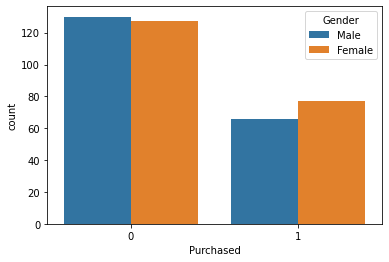

In [4]:
sns.countplot(x='Purchased', hue='Gender', data=data)

In [5]:
data['Purchased'].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

#### The value '1' indicates that a person have purchased a car whereas the value '0' shows the person hasn't.

### SUV Purchase by Age

In [6]:
print("Highest value of age: ", data["Age"].max())
print("Lowest value of age: ", data["Age"].min())

Highest value of age:  60
Lowest value of age:  18


#### Hence, the oldest person who bought the car is of 60 whereas the youngest person who bought a car is 18 years old.

<AxesSubplot:ylabel='Frequency'>

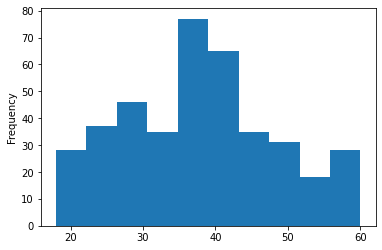

In [7]:
data['Age'].plot.hist()

In [8]:
# Making age categories
age_category = []
for i in range (0, len  (data ['Age'])):
    if data ['Age'][i] <= 20:
        age_category.append ('20 and below');
    elif 20 < data ['Age'][i] <= 30:
        age_category.append ('21 -30');
    elif 30 < data ['Age'][i] <= 40:
        age_category.append ('31 - 40');
    elif 40 < data ['Age'][i] <= 50:
        age_category.append ('41 - 50');
    elif 50 < data ['Age'][i] <= 60:
        age_category.append ('51 - 60');
    else:
        age_category.append ('61 and above');

age_data_frame = pd.DataFrame (data = age_category, columns = ['AgeCategory'])
data = pd.concat([data, age_data_frame], axis = 1)
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased,AgeCategory
0,15624510,Male,19,19000,0,20 and below
1,15810944,Male,35,20000,0,31 - 40
2,15668575,Female,26,43000,0,21 -30
3,15603246,Female,27,57000,0,21 -30
4,15804002,Male,19,76000,0,20 and below


<AxesSubplot:xlabel='Purchased', ylabel='count'>

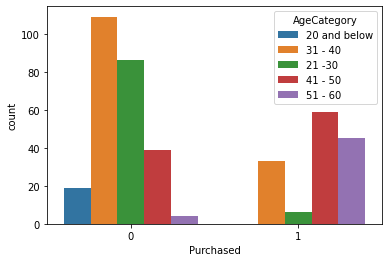

In [9]:
# Plotting a count plot
sns.countplot ( x = 'Purchased', hue = 'AgeCategory', data = data)

### SUV Purchase by Salary

In [10]:
print("Highest value of estimated salary: ", data["EstimatedSalary"].max())
print("Lowest value of estimated salary: ", data["EstimatedSalary"].min())

Highest value of estimated salary:  150000
Lowest value of estimated salary:  15000


In [11]:
data.groupby(by='Purchased').median()

,User ID,Age,EstimatedSalary
Purchased,,,
0,15693264.0,34.0,61000.0
1,15694829.0,47.0,90000.0


<AxesSubplot:xlabel='Age', ylabel='EstimatedSalary'>

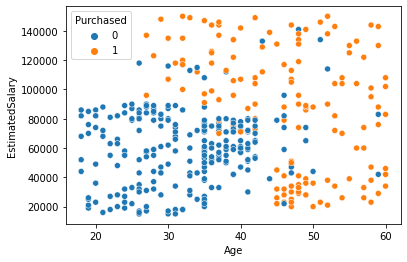

In [12]:
sns.scatterplot(x='Age', y='EstimatedSalary', hue='Purchased', data=data)

In [13]:
data2 = data.copy()
bins = [0, 40000, 80000, 120000]
labels =["Low Salary", "Medium Salary", "High Salary"]
data2['SalaryCategory'] = pd.cut(data2['EstimatedSalary'], bins, labels=labels)
data2.head()

,User ID,Gender,Age,EstimatedSalary,Purchased,AgeCategory,SalaryCategory
0,15624510,Male,19,19000,0,20 and below,Low Salary
1,15810944,Male,35,20000,0,31 - 40,Low Salary
2,15668575,Female,26,43000,0,21 -30,Medium Salary
3,15603246,Female,27,57000,0,21 -30,Medium Salary
4,15804002,Male,19,76000,0,20 and below,Medium Salary


<AxesSubplot:xlabel='Purchased', ylabel='count'>

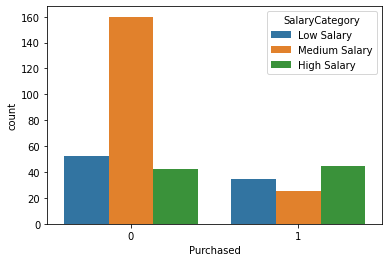

In [14]:
# Plotting a count plot
sns.countplot ( x = 'Purchased', hue = 'SalaryCategory', data = data2)

In [15]:
X = data.iloc[:,[2,3]].values
y = data['Purchased'].values

### Data Transformation

In [16]:
binary_gender = pd.get_dummies (data2 ['Gender'],drop_first = True)
binary_gender.head ()

,Male
0,1
1,1
2,0
3,0
4,1


In [17]:
binary_age = pd.get_dummies(data2 ['AgeCategory'],drop_first = True)
binary_age.head()

,21 -30,31 - 40,41 - 50,51 - 60
0,0,0,0,0
1,0,1,0,0
2,1,0,0,0
3,1,0,0,0
4,0,0,0,0


In [18]:
binary_salary = pd.get_dummies (data2 ['SalaryCategory'],drop_first = True)
binary_salary.head ()

,Medium Salary,High Salary
0,0,0
1,0,0
2,1,0
3,1,0
4,1,0


In [19]:
final_data_set  = pd.concat ([data2, binary_age, binary_gender, binary_salary], axis = 1)
final_data_set_1 = final_data_set.drop (columns = ['Age', 'Gender', 'EstimatedSalary', 'SalaryCategory', 'AgeCategory'], axis = 1)
final_data_set_1.head ()

,User ID,Purchased,21 -30,31 - 40,41 - 50,51 - 60,Male,Medium Salary,High Salary
0,15624510,0,0,0,0,0,1,0,0
1,15810944,0,0,1,0,0,1,0,0
2,15668575,0,1,0,0,0,0,1,0
3,15603246,0,1,0,0,0,0,1,0
4,15804002,0,0,0,0,0,1,1,0


### Data Modeling (Train & Test)

In [20]:
y = final_data_set_1 ['Purchased']
X = final_data_set_1.drop (columns = ['Purchased'], axis = 1)

In [21]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

In [22]:
X.head()

,User ID,21 -30,31 - 40,41 - 50,51 - 60,Male,Medium Salary,High Salary
0,15624510,0,0,0,0,1,0,0
1,15810944,0,1,0,0,1,0,0
2,15668575,1,0,0,0,0,1,0
3,15603246,1,0,0,0,0,1,0
4,15804002,0,0,0,0,1,1,0


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Building a Logistic Regression Model

In [24]:
sc = StandardScaler()
X_train_new = sc.fit_transform(X_train)
X_test_new = sc.fit_transform(X_test)

In [25]:
logreg=LogisticRegression()
logreg.fit(X_train_new, y_train)

LogisticRegression()

In [26]:
y_pred = logreg.predict(X_test_new)

In [27]:
acc_log = accuracy_score(y_test, y_pred)
print("Accuracy score: ",acc_log)
print("Accuracy score in %: ",acc_log*100)

Accuracy score:  0.9
Accuracy score in %:  90.0


In [28]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.94      0.92        52
           1       0.88      0.82      0.85        28

    accuracy                           0.90        80
   macro avg       0.90      0.88      0.89        80
weighted avg       0.90      0.90      0.90        80



In [29]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[49,  3],
       [ 5, 23]], dtype=int64)

<AxesSubplot:>

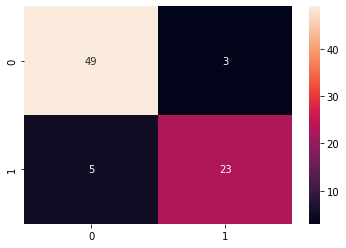

In [30]:
sns.heatmap(cm,annot=True)

## Now, let's try and build other machine learning models as well

### Support Vector Machines

In [31]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train_new, y_train)
Y_pred = svc.predict(X_test_new)
acc_svc = round(svc.score(X_train_new, y_train) * 100, 2)
acc_svc

86.56

### k-Nearest Neighbors algorithm

In [32]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train_new, y_train)
Y_pred = knn.predict(X_test_new)
acc_knn = round(knn.score(X_train_new, y_train) * 100, 2)
acc_knn

89.06

### Naive Bayes classifiers

In [33]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train_new, y_train)
Y_pred = gaussian.predict(X_test_new)
acc_gaussian = round(gaussian.score(X_train_new, y_train) * 100, 2)
acc_gaussian

82.81

## Model Evaluation

In [34]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 'Naive Bayes'],
    'Score': [acc_svc, acc_knn, acc_log, acc_gaussian]})
models.sort_values(by='Score', ascending=False)

,Model,Score
1,KNN,89.06
0,Support Vector Machines,86.56
3,Naive Bayes,82.81
2,Logistic Regression,0.90
